# Board games object tracking

Add the video files from shared [folder](https://drive.google.com/drive/folders/1CAKG0U1ZXzRS02MkrOCM3pTlMjBN6GFb?usp=share_link)

In [223]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL
import os
import sys
import glob
import random

from pprint import pprint
from IPython.display import Video

from PIL import Image
from PIL.ExifTags import TAGS

paths = glob.glob('./data/*.mp4')
paths
# for name in os.listdir('./data/'):
#   x = name[:-4].split('_')
#   print(x)


['./data\\catan_lvl1_1.mp4',
 './data\\catan_lvl1_2.mp4',
 './data\\catan_lvl1_3.mp4',
 './data\\catan_lvl1_4.mp4',
 './data\\catan_lvl2_1.mp4',
 './data\\catan_lvl3_1.mp4',
 './data\\catan_lvl3_2.mp4',
 './data\\catan_lvl3_3.mp4',
 './data\\cyklady_lvl1_1.mp4',
 './data\\cyklady_lvl1_2.mp4',
 './data\\cyklady_lvl1_3.mp4',
 './data\\cyklady_lvl1_4.mp4',
 './data\\cyklady_lvl1_5.mp4',
 './data\\cyklady_lvl1_6.mp4',
 './data\\cyklady_lvl2_1.mp4',
 './data\\cyklady_lvl2_2.mp4',
 './data\\cyklady_lvl3_1.mp4',
 './data\\cyklady_lvl3_2.mp4',
 './data\\cyklady_lvl3_3.mp4']

In [224]:
if 'google.colab' in str(get_ipython()):
  from google.colab.patches import cv2_imshow
  imshow = cv2_imshow
else:
  def imshow(a):
    a = a.clip(0, 255).astype('uint8')
    if a.ndim == 3:
      if a.shape[2] == 4:
        a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
      else:
        a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display(PIL.Image.fromarray(a))


In [226]:
video = cv2.VideoCapture(paths[0])
if video.isOpened():
    print('Video loaded')
video_width = int(video.get(3))
video_height = int(video.get(4))

print(video_height, video_width)

video_fps = video.get(cv2.CAP_PROP_FPS)
print(video_fps)


Video loaded
1088 1920
29.99921729331011


In [208]:
# Video('./data/catan_lvl1_1.mp4', height=540, width=960)

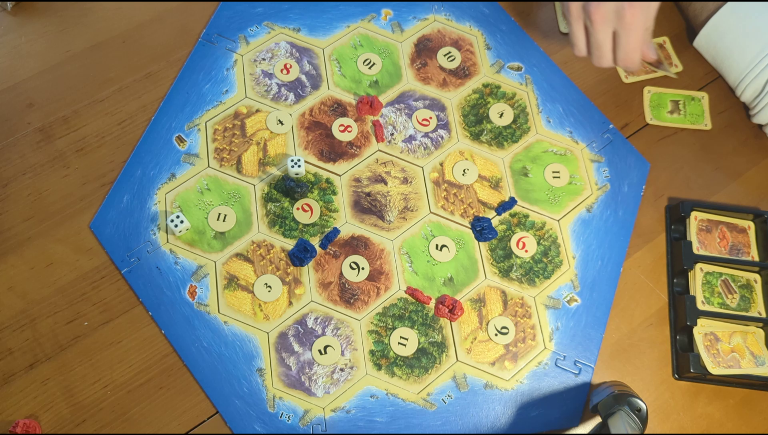

In [227]:
first_frame = None
while True:
    ret, frame = video.read()
    if ret:
        imshow(cv2.resize(frame, None, fx=0.4, fy=0.4))
        first_frame = frame
        break
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break


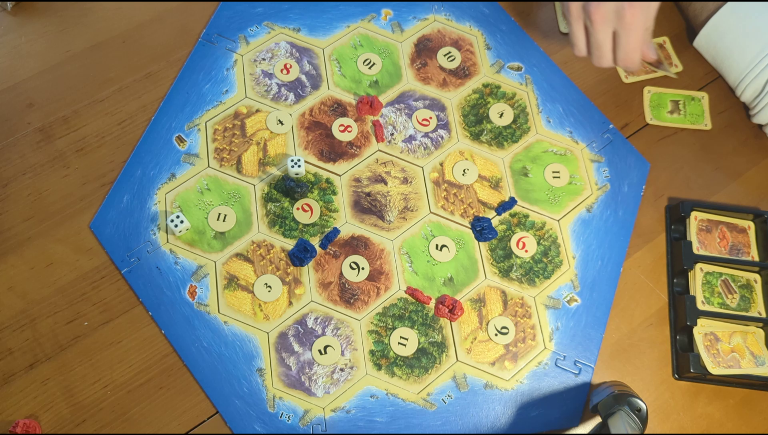

In [228]:
imshow(cv2.resize(first_frame, None, fx=0.4, fy=0.4))


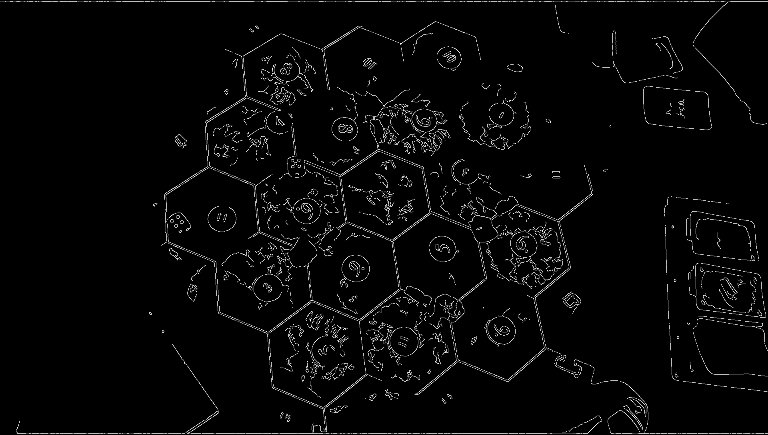

In [229]:
def detect_edges(frame, low_threshold=50, high_threshold=190):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (7,7), 0)
    edges = cv2.Canny(blur, low_threshold, high_threshold, apertureSize=3)
    return edges


imshow(cv2.resize(detect_edges(first_frame), None, fx=0.4, fy=0.4))


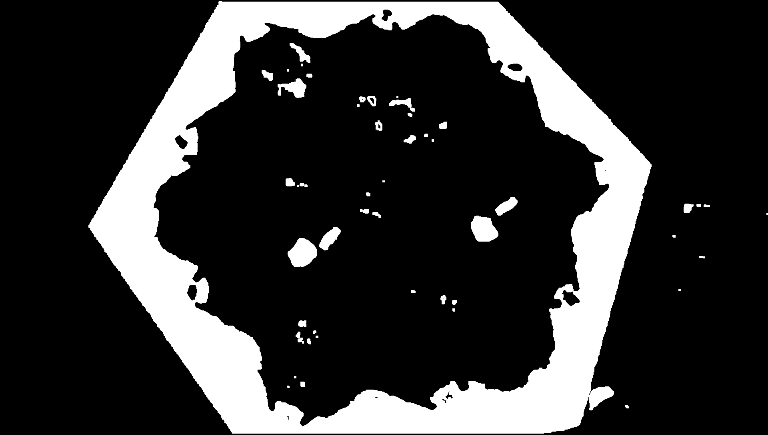

In [230]:
hsv = cv2.cvtColor(first_frame, cv2.COLOR_BGR2HSV)
blur = cv2.GaussianBlur(hsv, (7, 7), 0)
blue = cv2.inRange(blur, (100, 50, 50), (140, 255, 255))
# eroded = cv2.erode(blue, np.ones((7,7), np.uint8), iterations=3)
dilated = cv2.dilate(blue, np.ones((3, 3), np.uint8), iterations=2)
imshow(cv2.resize(dilated, None, fx=0.4, fy=0.4))


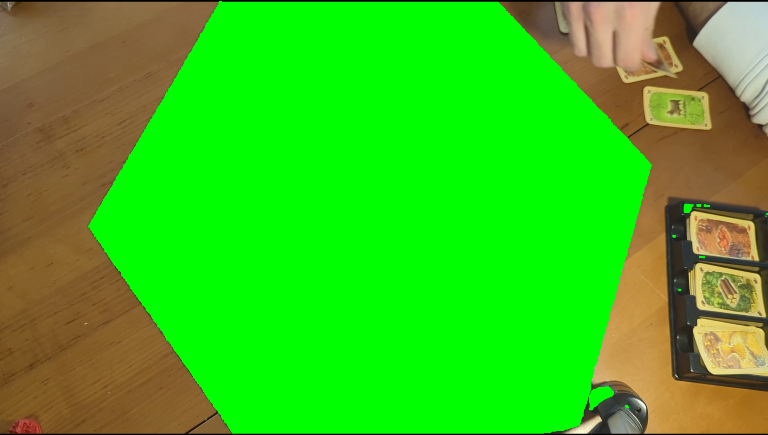

In [233]:
contours, hierarchy = cv2.findContours(dilated,
                                       cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
new = first_frame.copy()
filled = cv2.drawContours(new, contours, -1, (0,255,0), -3)
imshow(cv2.resize(filled, None, fx=0.4, fy=0.4))


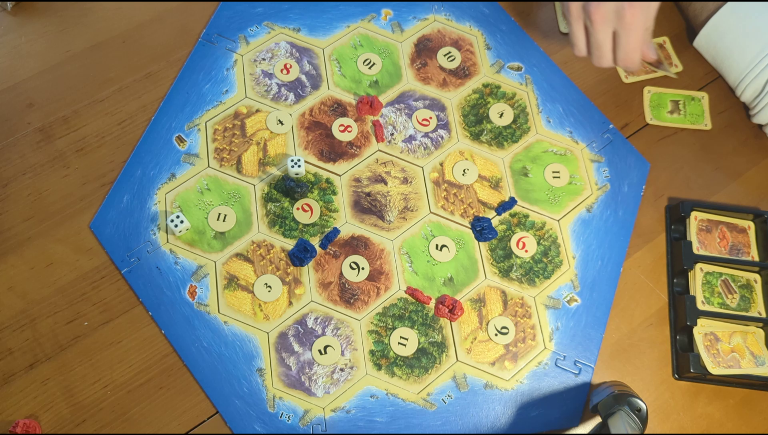

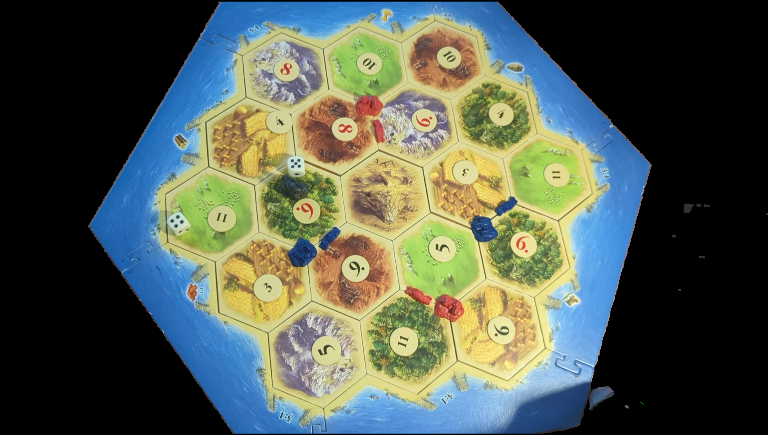

In [234]:
new = first_frame.copy()
imshow(cv2.resize(new, None, fx=0.4, fy=0.4))
new[filled != [0,255,0]] = 0
# new[dilated > 0] = 0
imshow(cv2.resize(new, None, fx=0.4, fy=0.4))


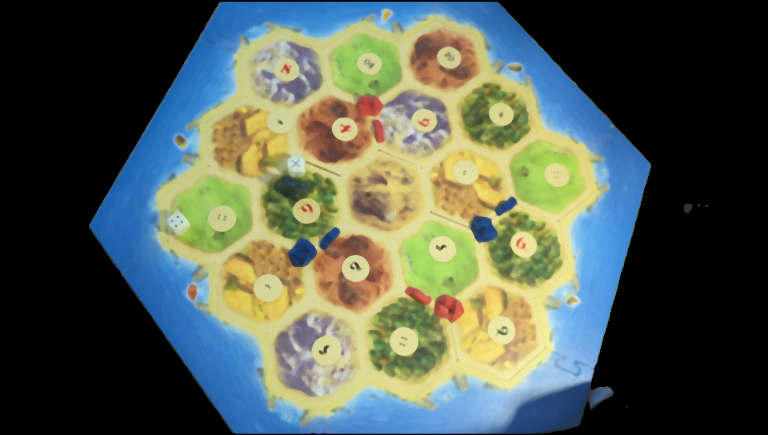

In [235]:
median = cv2.medianBlur(new, 11)
imshow(cv2.resize(median, None, fx=0.4, fy=0.4))

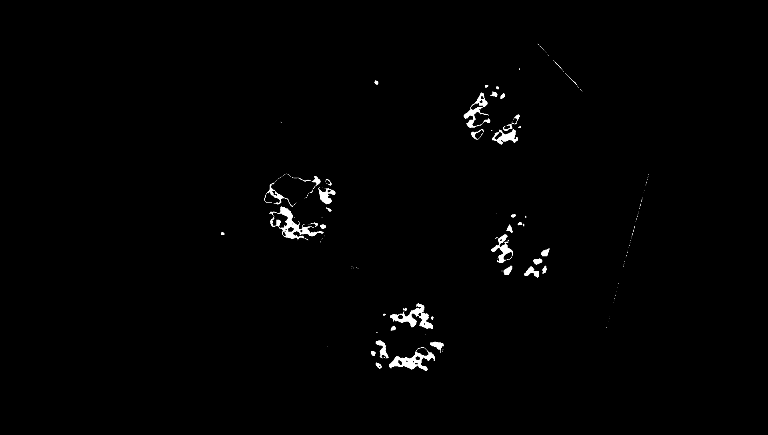

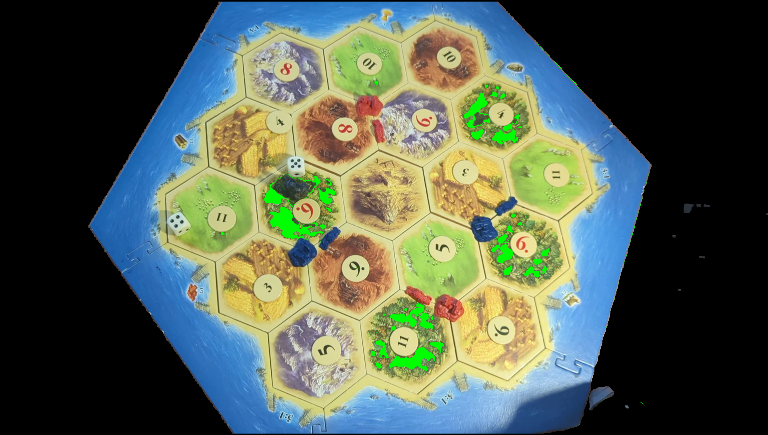

In [236]:
green = cv2.inRange(median, (0, 100, 0), (100, 255, 100))
imshow(cv2.resize(green, None, fx=0.4, fy=0.4))
contours, hierarchy = cv2.findContours(green,
                                       cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
color1 = new.copy()
filled2 = cv2.drawContours(color1, contours, -1, (0, 255, 0), -3)
imshow(cv2.resize(filled2, None, fx=0.4, fy=0.4))
